# Exercises - SOLUTIONS

Okay, we've spent a long time looking at how to high-pass filter a simple dataset and found out that it is not *at all* trivial and we need to be careful. This is why you don't just have a simple `high_pass_filter` function in scipy. Here find some examples to test your knowledge, which will ask you to implement *other* types of filters.

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.signal

In [2]:
def compute_fourier_transform(data):
    return np.fft.fft(data)

def compute_inverse_fourier_transform(data):
    return np.fft.ifft(data)

## Exercise 1 - low-pass filter

Take data_time_domain_EXERCISE1 below and create, and perform, a *low*-pass filter, removing all frequency content above 2Hz. Using scipy will be easier, but your choice. Demonstrate that the 0.5Hz signal buried in that data is visible in both the time and frequency domains.


In [3]:
omega = 1. * (2*np.pi)
data_length = 256
sample_rate = 16
sample_points = int(data_length * sample_rate)
times = np.arange(sample_points) / sample_rate
frequencies = np.arange(sample_points) * (sample_rate/sample_points)

np.random.seed(1)
data_time_domain_EXERCISE1 = np.zeros(data_length * sample_rate)
# Add high frequency noise: components between 4 and 8Hz
for i in range(2*data_length*4,8*data_length*4):
    omega = (np.random.uniform() * 4 + 4) * (2*np.pi)
    phase = np.random.random() * (2*np.pi)
    data_time_domain_EXERCISE1 += 100*np.sin(times * omega + phase)

# Add in a single 4Hz sine wave
omega = 0.5 * (2*np.pi)
signal_EXERCISE1 = np.sin(times * omega)
data_time_domain_EXERCISE1 += signal_EXERCISE1

3776


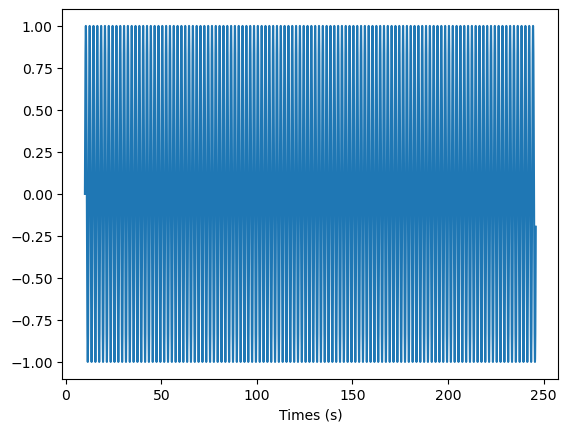

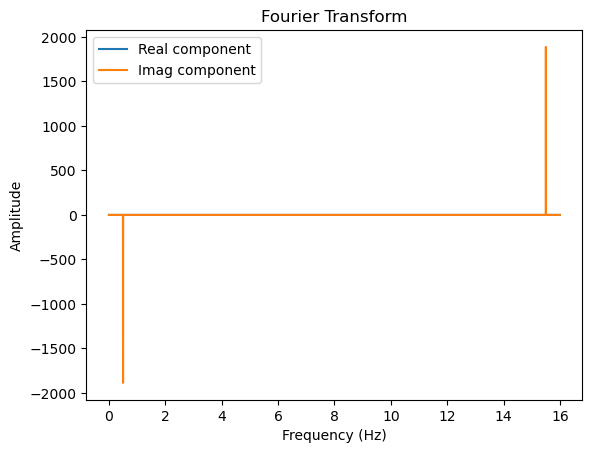

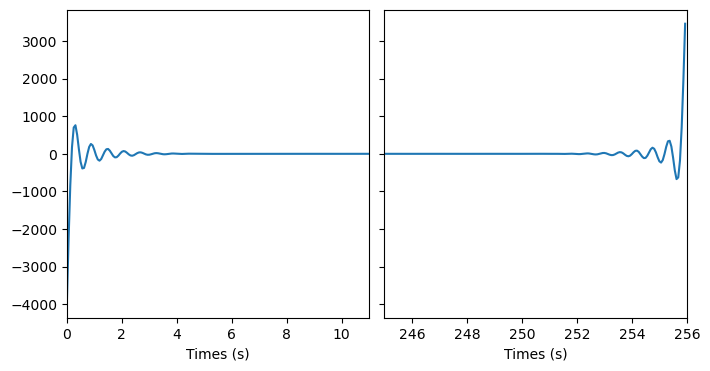

In [4]:
def lowpass_filter_scipy(data, sample_rate):
    # As we saw before, our filter cannot be an abrupt cut off. Here we say that no frequency content below 1Hz will
    # be passed, and all frequency content above 1.5Hz will be passed. Between there some content will be passed.
    filter_stop_freq = 1.5 # Hz
    filter_pass_freq = 2.  # Hz
    # The filter order is how long (in samples) the filter will be. We used 256 before, so use it again here.
    # However, due to symmetry, we enter (256 / 2) + 1
    filter_order = 129

    # High-pass filter
    nyquist_rate = sample_rate / 2.
    desired = (1, 1, 0, 0)
    bands = (0, filter_stop_freq, filter_pass_freq, nyquist_rate)
    filter_coefs = scipy.signal.firls(filter_order, bands, desired, fs=nyquist_rate * 2)

    # Apply high-pass filter
    filtered_data = scipy.signal.filtfilt(filter_coefs, [1], data)
    return filtered_data

data_time_domain_EXERCISE1_scipy_passed = lowpass_filter_scipy(data_time_domain_EXERCISE1, 16)
data_time_domain_EXERCISE1_scipy_passed_CUT = data_time_domain_EXERCISE1_scipy_passed[10*sample_rate:-10*sample_rate]
times_CUT = times[10*sample_rate:-10*sample_rate]

print(len(data_time_domain_EXERCISE1_scipy_passed_CUT))

plt.figure()
plt.plot(times_CUT, data_time_domain_EXERCISE1_scipy_passed_CUT)
plt.xlabel("Times (s)")

plt.figure()
data_frequency_domain = compute_fourier_transform(
    data_time_domain_EXERCISE1_scipy_passed_CUT
)
sample_points_CUT = len(data_time_domain_EXERCISE1_scipy_passed_CUT)
frequencies_CUT = np.arange(sample_points_CUT) * (sample_rate/sample_points_CUT)
plt.plot(frequencies_CUT, data_frequency_domain.real)
plt.plot(frequencies_CUT, data_frequency_domain.imag)
plt.title('Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(['Real component','Imag component'])

# The first and last 8s of the data (128 samples) are corrupted
fig, axes = plt.subplots(1,2, figsize=(8,4), sharey='row')
axes[0].plot(times, data_time_domain_EXERCISE1_scipy_passed)
axes[0].set_xlim(0, 11)
axes[1].plot(times, data_time_domain_EXERCISE1_scipy_passed)
axes[1].set_xlim(245, 256)
axes[0].set_xlabel("Times (s)")
axes[1].set_xlabel("Times (s)")
fig.subplots_adjust(wspace=0.05)


## Exercise 2 - band-pass filter

Take data_time_domain_EXERCISE2 below and perform a "band-pass" filter. Specifically, remove all frequency content above 4Hz and below 1Hz. Can you recover the 2Hz signal in that data?


In [5]:
omega = 1. * (2*np.pi)
data_length = 256
sample_rate = 16
sample_points = int(data_length * sample_rate)
times = np.arange(sample_points) / sample_rate

np.random.seed(2)
data_time_domain_EXERCISE2 = np.zeros(data_length * sample_rate)
# Add low frequency noise: No components above 1Hz
for i in range(1,1*data_length*4):
    omega = np.random.uniform() * (2*np.pi)
    phase = np.random.random() * (2*np.pi)
    data_time_domain_EXERCISE2 += 100*np.sin(times * omega + phase)

# High frequency noise: between 4 and 8 Hz
for i in range(4*data_length*4,8*data_length*4):
    omega = 4 * (1 + np.random.uniform()) * (2*np.pi)
    phase = np.random.random() * (2*np.pi)
    data_time_domain_EXERCISE2 += 100*np.sin(times * omega + phase)

# Add in a single 2Hz sine wave
omega = 2 * (2*np.pi)
signal_EXERCISE2 = np.sin(times * omega)
data_time_domain_EXERCISE2 += signal_EXERCISE2

In [6]:
def bandpass_filter_scipy(data, sample_rate):
    # As we saw above, our filter cannot be an abrupt cut off. Here we say that no frequency content below 1Hz will
    # be passed, and all frequency content above 1.5Hz will be passed. Between there some content will be passed.
    filter_start_freq = 1 # Hz
    filter_pass_freq_1 = 1.5  # Hz
    filter_pass_freq_2 = 3.5
    filter_stop_freq = 4.
    # The filter order is how long (in samples) the filter will be. We used 256 before, so use it again here.
    # However, due to symmetry, we enter (256 / 2) + 1
    filter_order = 129

    # High-pass filter
    nyquist_rate = sample_rate / 2.
    desired = (0, 0, 1, 1, 0, 0)
    bands = (0, filter_start_freq, filter_pass_freq_1, filter_pass_freq_2, filter_stop_freq, nyquist_rate)
    filter_coefs = scipy.signal.firls(filter_order, bands, desired, fs=nyquist_rate*2)

    # Apply high-pass filter
    filtered_data = scipy.signal.filtfilt(filter_coefs, [1], data)
    return filtered_data


3776 3776


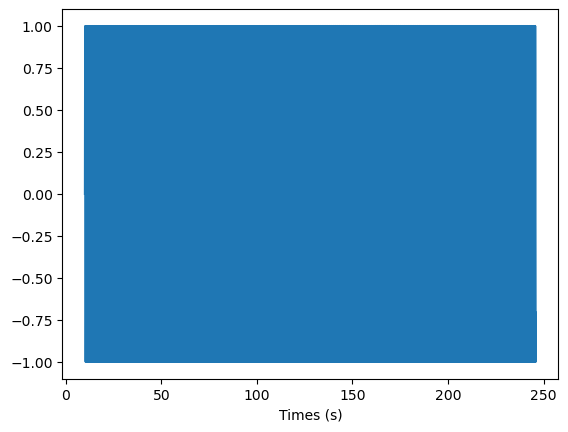

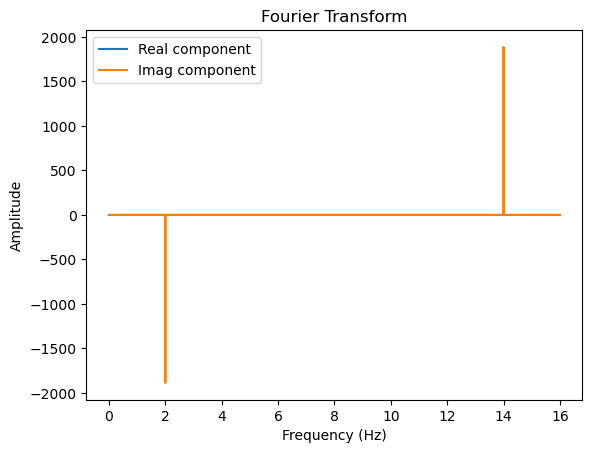

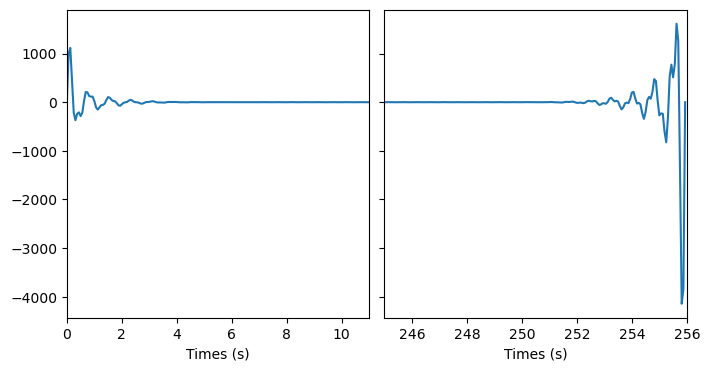

In [7]:
data_time_domain_EXERCISE2_scipy_passed = bandpass_filter_scipy(data_time_domain_EXERCISE2, 16)
data_time_domain_EXERCISE2_scipy_passed_CUT = data_time_domain_EXERCISE2_scipy_passed[10*sample_rate:-10*sample_rate]

print(len(times_CUT), len(data_time_domain_EXERCISE2_scipy_passed_CUT))

plt.figure()
plt.plot(times_CUT, data_time_domain_EXERCISE2_scipy_passed_CUT)
plt.xlabel("Times (s)")

plt.figure()
data_frequency_domain = compute_fourier_transform(data_time_domain_EXERCISE2_scipy_passed_CUT)
plt.plot(frequencies_CUT, data_frequency_domain.real)
plt.plot(frequencies_CUT, data_frequency_domain.imag)
plt.title('Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(['Real component','Imag component'])

# Let's zoom in on the start/end of the processed data
fig, axes = plt.subplots(1,2, figsize=(8,4), sharey='row')
axes[0].plot(times, data_time_domain_EXERCISE2_scipy_passed)
axes[0].set_xlim(0, 11)
axes[1].plot(times, data_time_domain_EXERCISE2_scipy_passed)
axes[1].set_xlim(245, 256)
axes[0].set_xlabel("Times (s)")
axes[1].set_xlabel("Times (s)")
fig.subplots_adjust(wspace=0.05)

## Exercise - re-weighting noise

CHALLENGING: The data_time_domain_EXERCISE3 below contains "pink" noise (lower frequency content is louder than higher frequency content). Can you convert this into "white" noise where the contribution to the noise at all frequencies is equal?


In [8]:
omega = 1. * (2*np.pi)
data_length = 256
sample_rate = 16
sample_points = int(data_length * sample_rate)
times = np.arange(sample_points) / sample_rate

np.random.seed(3)
data_time_domain_EXERCISE3 = np.zeros(data_length * sample_rate)
# Add low frequency noise: No components above 1Hz
for i in range(1,8*(data_length*4)):
    omega = i / (data_length*4) * (2*np.pi)
    phase = np.random.random() * (2*np.pi)
    data_time_domain_EXERCISE3 += (1./i) * np.sin(times * omega + phase)

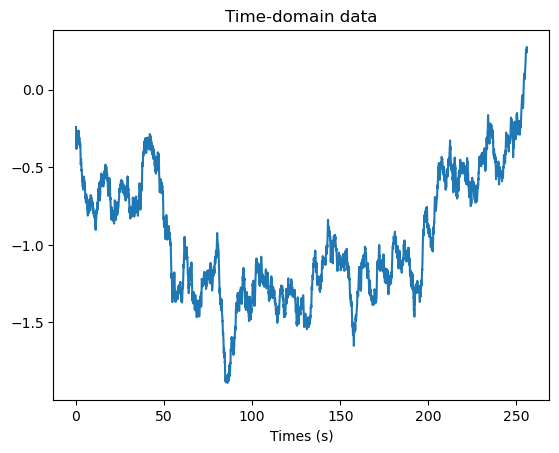

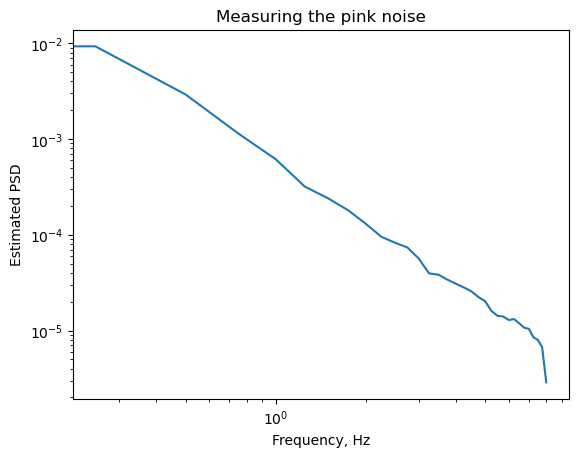

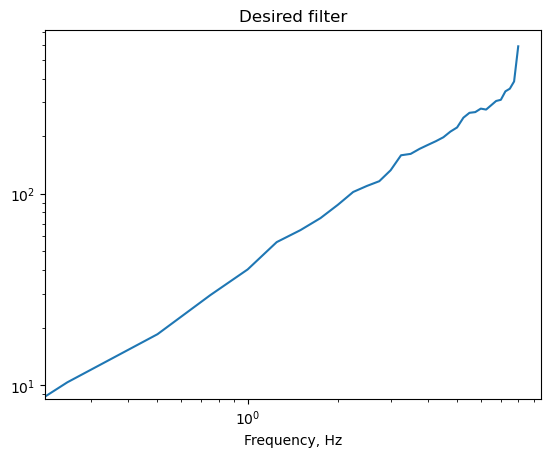

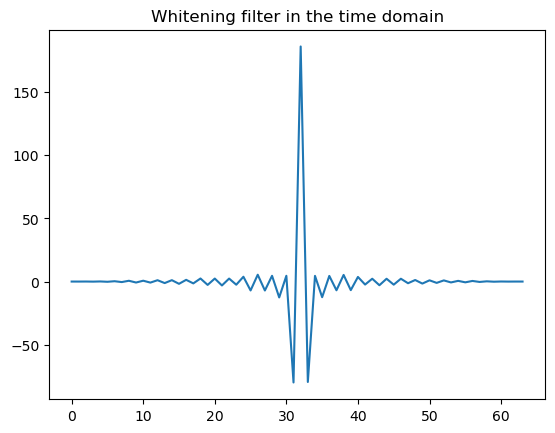

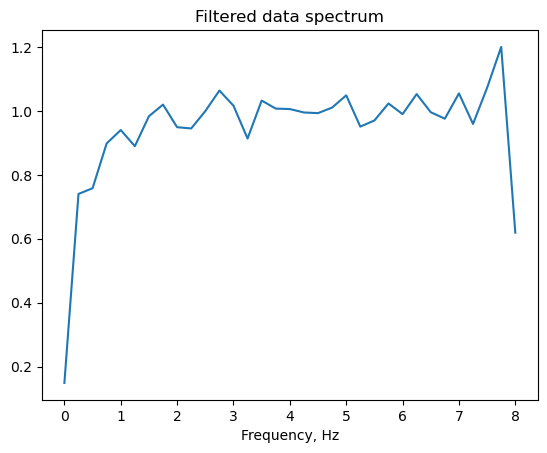

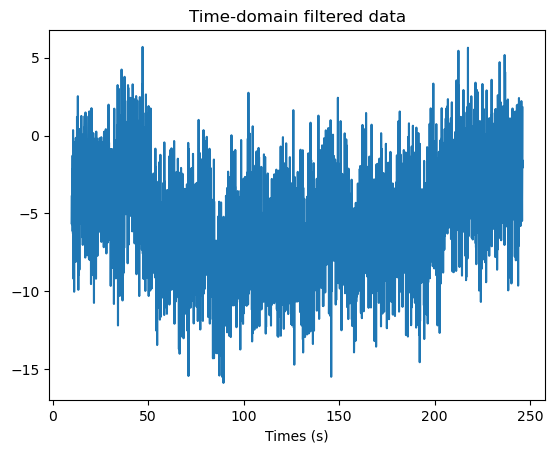

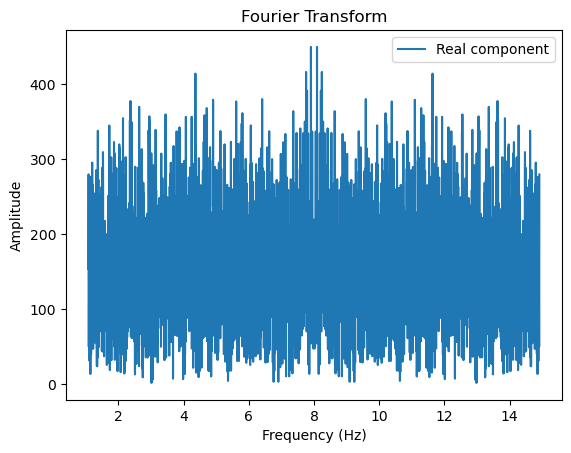

In [9]:
# This uses numpy/scipy functions directly
# rather than illustrating the code in full
import scipy.signal as sig
from numpy.fft import rfft, irfft

# Lets start off by plotting the data to begin with:
plt.figure()
plt.title("Time-domain data")
plt.plot(times, data_time_domain_EXERCISE3)
plt.xlabel("Times (s)")

# This measures the frequency spectrum of the noise, rather than relying on knowing that it is pink noise
fs = sample_rate
f, psd = sig.welch(data_time_domain_EXERCISE3, nperseg=4*fs, fs=fs)

plt.figure()
plt.title("Measuring the pink noise")
plt.loglog(f, psd)
plt.xlabel("Frequency, Hz")
plt.ylabel("Estimated PSD")

# Invert this - this is the "getting back to white noise" filter we want
# and plot on loglog
plt.figure()
invasd = psd**-0.5
invasd[0] = 0.
plt.loglog(f, invasd)
plt.xlabel("Frequency, Hz")
plt.title("Desired filter")

# Now we IFFT this filter and roll it, just as in the solution above
tmp = np.roll(irfft(invasd), 2*fs)
filt = sig.windows.hann(4*fs)*tmp

plt.figure()
plt.title("Whitening filter in the time domain")
plt.plot(filt)

# And convolve the data with this filter
whitened = sig.convolve(data_time_domain_EXERCISE3, filt, mode='same')

# Now we measure the spectrum of the data again:
f, psd_w = sig.welch(whitened[2*fs:-2*fs], nperseg=4*fs, fs=fs)
plt.figure()
plt.title("Filtered data spectrum")
plt.plot(f, psd_w)
plt.xlabel("Frequency, Hz")

# Or to use the same plotting code as the solution above:
high_passed_data_CUT = whitened[10*sample_rate:-10*sample_rate]

plt.figure()
plt.title("Time-domain filtered data")
plt.plot(times_CUT, high_passed_data_CUT)
plt.xlabel("Times (s)")

plt.figure()
data_frequency_domain = compute_fourier_transform(high_passed_data_CUT)
# We cut off the very low/high frequencies as this data has been
# corrupted in the same way our time domain data was before
plt.plot(
    frequencies_CUT[data_length:-data_length],
    abs(data_frequency_domain[data_length:-data_length])
)
plt.title('Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(['Real component','Imag component'])